In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.9.2


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
%cd /content/gdrive/MyDrive/Colab Notebooks/malaria_dataset

/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset


In [7]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset


In [8]:
# from google.colab import files
# files.upload()

In [9]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !rm kaggle.json

In [10]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset


In [11]:
# !kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

In [12]:
# !unzip "/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/cell-images-for-detecting-malaria.zip"

In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [14]:
np.random.seed(101)

In [15]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset


In [16]:
path_parasitized = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/cell_images/Parasitized'
path_uninfected = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/cell_images/Uninfected'

### **Creating the Dataset from the given images of the current directory**

In [17]:
# dataset = []
# label = []

In [18]:
# for i, image_name in enumerate(os.listdir(path_parasitized)):
#   if(image_name.split('.')[1] == 'png'):
#     image = mpimg.imread(path_parasitized+"/"+image_name)
#     dataset.append(image)
#   break

# print(dataset)
# len(dataset)

In [19]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
input_folder_path = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/cell_images'
output_folder_path = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset'

### **Dividing the present dataset into Train, Test and Validation directories**

In [21]:
import splitfolders

# splitfolders.ratio(input_folder_path, output=output_folder_path,
#     seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

In [22]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset


In [23]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset'

/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset


In [24]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset


In [25]:
for dirpath, dirnames, filenames in os.walk('/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {len(dirpath)}.')

There are 3 directories and 7 images in 82.
There are 2 directories and 0 images in 88.
There are 0 directories and 11024 images in 100.
There are 0 directories and 11024 images in 99.
There are 2 directories and 0 images in 86.
There are 0 directories and 1378 images in 98.
There are 0 directories and 1377 images in 97.
There are 2 directories and 0 images in 87.
There are 0 directories and 1378 images in 99.
There are 0 directories and 1378 images in 98.


In [26]:
## From above information we can see that we have 11024 images in train set and 1378
# images in test and validation set respectively

## **Get a complete list of no. of items in the respective directories**

In [27]:
# No.of images of uninfected cells in train set
len(os.listdir('/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/train/Uninfected'))

11024

In [28]:
# No.of images of Parasitized cells in train set
len(os.listdir('/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/train/Uninfected'))

11024

In [29]:
# No.of images of uninfected cells in test set
len(os.listdir('/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/test/Uninfected'))

1378

In [30]:
# No.of images of Parasitized cells in test set
len(os.listdir('/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/test/Parasitized'))

1378

##**Getting the class names programmatically**

In [31]:
import pathlib
data_dir = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/train')


#Create a list of class names from the subdirectory
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Parasitized' 'Uninfected']


### **Visualizing the images**

In [32]:
## Using helper function to view random images

import random

def view_random_image(target_dir, target_class):

  #Setting up the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Getting a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Reading image and displaying using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # Showing the size of image

  return img

['C111P72ThinF_IMG_20150930_113049_cell_166.png']
Image shape: (145, 136, 3)


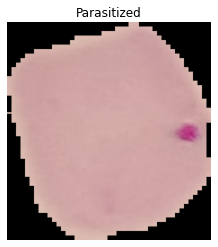

In [33]:
# Viewing random Parasitized image

target_directory_for_images = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/train/'
target_class_of_image = 'Parasitized'

img_class1 = view_random_image(target_dir = target_directory_for_images, 
                        target_class = target_class_of_image)

['C61P22N_ThinF_IMG_20150818_112518_cell_9.png']
Image shape: (118, 121, 3)


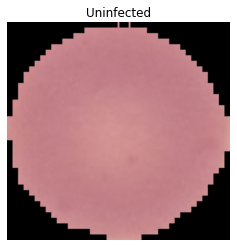

In [34]:
# Viewing random Uninfected image

target_directory_for_images = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/train/'
target_class_of_image = 'Uninfected'

img_class2 = view_random_image(target_dir = target_directory_for_images, 
                        target_class = target_class_of_image)

In [35]:
img_class1.shape

(145, 136, 3)

In [36]:
img_class2.shape,img_class2

((118, 121, 3), array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32))

### **Normalizing our data according to the mean dimension of the images present in the training folder**

In [37]:
## Setting training, validation and testing directories

train_path = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/train/'
val_path = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/val/'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/malaria_dataset/malaria_segregated_dataset/test/'

In [38]:
class_names,class_names[0], type(class_names[0])

(array(['Parasitized', 'Uninfected'], dtype='<U11'), 'Parasitized', numpy.str_)

In [39]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+class_names[1]):
    
    if(image_filename.split('.')[1] == 'png'):
      img = mpimg.imread(train_path+class_names[1] +'/'+image_filename)
      d1,d2,colors = img.shape
      dim1.append(d1)
      dim2.append(d2)


np.mean(dim1),np.mean(dim2)

(131.6977229429375, 131.44978680939852)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


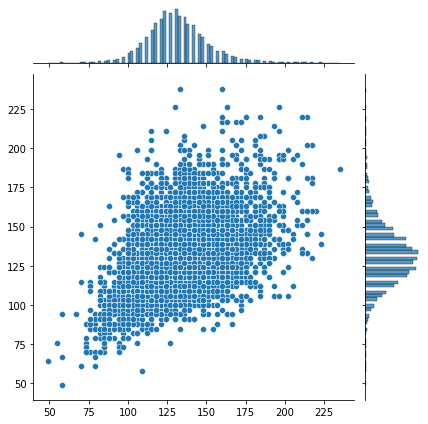

In [40]:
# Visualizing the mean dimension for all the images in the train set

sns.jointplot(dim1,dim2)

### **Augmenting images using image data generator**

In [41]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization ,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
image_size = (131,131)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, # Shift the pic width by a max of 5%
    height_shift_range=0.10, # Shift the pic height by a max of 5%
    rescale=1/255, # Rescale the image by normalzing it.
    shear_range=0.1, # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1, # Zoom in by 10% max
    horizontal_flip=True, # Allow horizontal flipping
    fill_mode='nearest' # Fill in missing pixels with the nearest filled value
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=32,
    color_mode='rgb',
    class_mode='binary'
)

validation_gen = datagen.flow_from_directory(
    val_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'
)

Found 22046 images belonging to 2 classes.
Found 2755 images belonging to 2 classes.


In [43]:
train_gen.class_indices   #Lables

{'Parasitized': 0, 'Uninfected': 1}

In [44]:
validation_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

#### **Defining callback for plotting losses and accuracy**

In [45]:
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
        

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('Log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="val_accuracy")
        ax2.legend()
        
        plt.show()
        
        
plot = PlotLearning()

## **Defining the CNN model with keras functional API**

In [46]:
from tensorflow.keras.models import Model

In [47]:
## Implementing distributed training with multiple GPUs for faster training

mirrored_strategy = tf.distribute.MirroredStrategy()

with mirrored_strategy.scope():

  # model = Sequential()

  # model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2,2)))

  # model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2,2)))

  # model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2,2)))

  # model.add(Flatten())

  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.5))

  # model.add(Dense(1, activation='sigmoid'))

  i = Input(shape=image_size+(3,))

  x = Conv2D(32, kernel_size=(3,3), activation='relu')(i)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Flatten()(x)

  x = Dense(128, activation = 'relu')(x)
  x = Dropout(0.5)(x)

  x = Dense(1, activation='sigmoid')(x)

  model = Model(i,x)


In [48]:
# Compiling and Summarizing the Model

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 131, 131, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 129, 129, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928 

In [49]:
## Fitting the model

model_history = model.fit(train_gen, epochs=20, validation_data=validation_gen)

Epoch 1/20
689/689 [==============================] - 1323s 2s/step - loss: 0.4199 - accuracy: 0.8213 - val_loss: 0.2372 - val_accuracy: 0.9209
Epoch 2/20
689/689 [==============================] - 151s 219ms/step - loss: 0.1993 - accuracy: 0.9342 - val_loss: 0.1818 - val_accuracy: 0.9383
Epoch 3/20
689/689 [==============================] - 150s 217ms/step - loss: 0.1813 - accuracy: 0.9424 - val_loss: 0.1615 - val_accuracy: 0.9452
Epoch 4/20
689/689 [==============================] - 149s 216ms/step - loss: 0.1693 - accuracy: 0.9471 - val_loss: 0.1548 - val_accuracy: 0.9485
Epoch 5/20
689/689 [==============================] - 151s 219ms/step - loss: 0.1631 - accuracy: 0.9495 - val_loss: 0.1506 - val_accuracy: 0.9481
Epoch 6/20
689/689 [==============================] - 150s 217ms/step - loss: 0.1615 - accuracy: 0.9492 - val_loss: 0.1552 - val_accuracy: 0.9456
Epoch 7/20
689/689 [==============================] - 149s 216ms/step - loss: 0.1554 - accuracy: 0.9511 - val_loss: 0.1625 - v

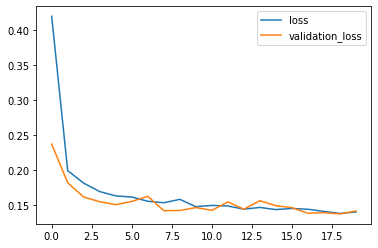

In [50]:
#Plotting loss per iteration

plt.plot(model_history.history['loss'],label='loss')
plt.plot(model_history.history['val_loss'], label = 'validation_loss')
plt.legend()

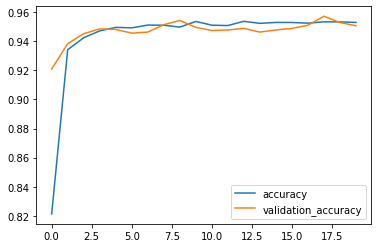

In [51]:
#Plotting accuracy per iteration

plt.plot(model_history.history['accuracy'],label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()

In [52]:
## Evaluating our model

print(model.evaluate(validation_gen))

87/87 [==============================] - 16s 184ms/step - loss: 0.1349 - accuracy: 0.9539
[0.13492046296596527, 0.953902006149292]


In [53]:
model.metrics, model.metrics_names

([<keras.metrics.base_metric.Mean at 0x7f9b4f773ca0>,
 ['loss', 'accuracy'])

## Testing and predicting custom images

In [54]:
# !pwd
# !cd ..

In [55]:
%cd /content/gdrive/MyDrive/Colab Notebooks/
!pwd

/content/gdrive/MyDrive/Colab Notebooks
/content/gdrive/MyDrive/Colab Notebooks


Saving C184P145ThinF_IMG_20151203_104153_cell_138.png to C184P145ThinF_IMG_20151203_104153_cell_138.png
Saving C241NThinF_IMG_20151207_124358_cell_144.png to C241NThinF_IMG_20151207_124358_cell_144.png
1/1 [==============================] - 1s 1s/step
[[0.]]
C184P145ThinF_IMG_20151203_104153_cell_138.png is a parasitized
1/1 [==============================] - 0s 56ms/step
[[1.]]
C241NThinF_IMG_20151207_124358_cell_144.png is a uninfected


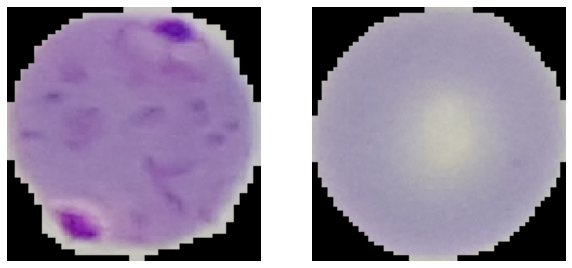

In [56]:

import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()

plt.figure(figsize=(10, 10))

i=1

for fn in uploaded.keys():
 
  # predicting images
  path='/content/gdrive/MyDrive/Colab Notebooks/' + fn
  img=image.load_img(path, target_size=(131, 131))

  plt.subplot(1,2,i)
  
  plt.imshow(img,label=fn)
  plt.axis('off')

  i+=1

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=16)
  
  print(classes)
  
  if classes[0]>0:
    print(fn + " is a uninfected")
    
  else:
    print(fn + " is a parasitized")